# Case Study: Linear Regression of Height & Weight

## Authors:
### Jerome Geronimo
### Cole Dorman

### Item 2  
#### Import all the modules required
#### - numpy
#### - pandas
#### - matplotlib
#### - seaborn
#### - LinearRegression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Item 3
#### Read the height_mass.csv file into a Pandas DataSet called: people
#### Use the pandas read_csv method.

In [3]:
people = pd.read_csv('data/height_mass.csv')
people

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


### Item 4
#### Use a Seaborn histplot to show the distribution for Mass.
#### Experiment with different bin #’s and find which one gives you the clearest information about the data.


<Axes: xlabel='Mass (kg)', ylabel='Count'>

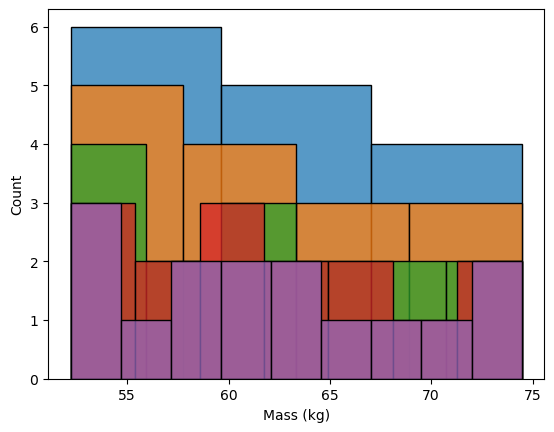

In [4]:
sns.histplot(people, x='Mass (kg)', bins=3)
sns.histplot(people, x='Mass (kg)', bins=4)
sns.histplot(people, x='Mass (kg)', bins=6)
sns.histplot(people, x='Mass (kg)', bins=7)
sns.histplot(people, x='Mass (kg)', bins=9)

#### What does the plot tell you about the data?

Segregating the samples into 6 bins provides clear information that the weight of the people in the sample dataset is skewed to the right. This means that there are more people in the sample that have less mass/weight versus those who have more mass/weight.

Also, based on the plot, more than 50% of the sample has a weight < 65kg.

A visual trend is as we increase the number of bins, the distribution evens out.

### Item 5
#### Use a Seaborn histplot to show the distribution for Height.
#### Experiment with different bin #’s and find which one gives you the clearest information about the data.

<Axes: xlabel='Height (m)', ylabel='Count'>

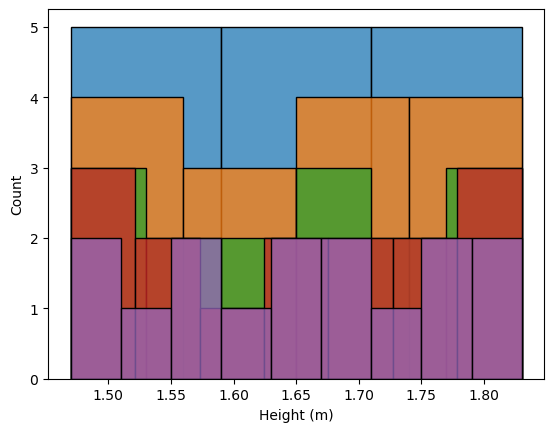

In [5]:
sns.histplot(people, x='Height (m)', bins=3)
sns.histplot(people, x='Height (m)', bins=4)
sns.histplot(people, x='Height (m)', bins=6)
sns.histplot(people, x='Height (m)', bins=7)
sns.histplot(people, x='Height (m)', bins=9)

#### What does the plot tell you about the data?

Regardless of the number of bins, the graph shows that there is a relatively equal distribution of people across the different heights. We also noticed that, as we increased the number of bins, to a degree, the distribution becomes less even.

### Item 6
#### Use a Seaborn jointplot to plot x=Height, y=Mass
#### Experiment with different bin #’s and find which one gives you the clearest information about the data.

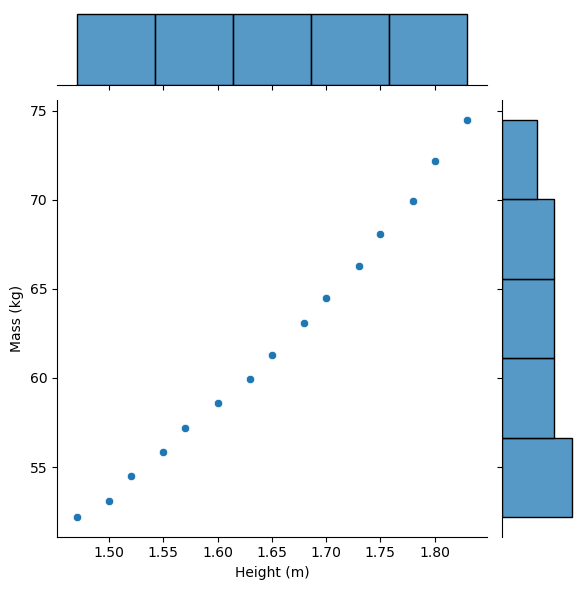

In [6]:
sns.jointplot(people, x='Height (m)', y='Mass (kg)')

#### Does this plot confirm what the histplot showed?

The joint plot confirms the insights about the sample distribution drawn from the histplots above. Also, one observation we had is that the majority of people in the dataset fall under the median mass.

In addition, this joint plot shows a positive correlation between height and mass, which means that taller people tend to have more mass.

### Item 7
#### Split the data into training and testing data, using appropriate variable names.
#### Use sklearn train_test_split to split the data.

In [7]:
from sklearn.model_selection import train_test_split
 
# Prepare x and y
x = people.drop('Mass (kg)', axis=1)
y = people['Mass (kg)']
 
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
display(x_train, x_test, y_train, y_test)

,Height (m)
13,1.80
5,1.60
8,1.68
2,1.52
1,1.50
14,1.83
4,1.57
7,1.65
10,1.73
12,1.78


,Height (m)
9,1.70
11,1.75
0,1.47


13    72.19
5     58.57
8     63.11
2     54.48
1     53.12
14    74.46
4     57.20
7     61.29
10    66.28
12    69.92
3     55.84
6     59.93
Name: Mass (kg), dtype: float64

9     64.47
11    68.10
0     52.21
Name: Mass (kg), dtype: float64

### Item 8
#### Create the model and fit it to the training data.
#### Create a sklearn LinearRegression model.
#### Use the fit method to fit it to the training data.

In [9]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### Item 9
#### Predict values based on testing data.
#### Use the predict method to predict values with the x testing data.

In [10]:
predictions = lm.predict(x_test)
predictions

array([65.14531356, 68.30189952, 50.62501816])

### Item 10
#### Print out error metrics:
#### - Mean Absolute Error (MAE)
#### - Mean Squared Error (MSE)
#### - Root Mean Squared Error (RMSE)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict values based on testing data
y_pred = lm.predict(x_test)
 
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MAE', mae)
print('MSE', mse)
print('RMSE', rmse)

MAE 0.8207316384180791
MSE 1.0029930838678223
RMSE 1.0014954237877587


### Item 11
#### Predict some specific mass. Choose any height directly from the data, predict the weight for that height, and see whether the prediction is close to reality.
#### Explain how well the prediction matched reality, with specific attention to the RMSE error. Be specific and compare the numbers.

In [12]:
specific_height = people["Height (m)"].sample(1)
specific_height = np.array(specific_height).reshape(-1, 1)
 
print("Specific Height", specific_height[0])
predicted_weight = lm.predict(specific_height)
print("Predicted Weight", predicted_weight)

people[people["Height (m)"] == specific_height[0][0]]

Specific Height [1.75]
Predicted Weight [68.30189952]


,Height (m),Mass (kg)
11,1.75,68.1


The linear regression model predicted a really good value for the height chosen above, with a really small error.
 
This is a realistic prediction given that the predicted value is within (+/-1.00) of the actual value.

### Item 12
#### Use seaborn to display an lmplot with the linear regression line shown (fit_reg=True).
#### Explain how well the prediction matched reality, with specific attention to the RMSE error. Be specific and compare the numbers.

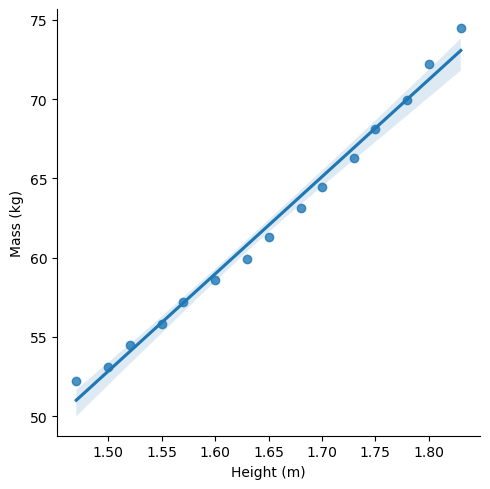

In [13]:
sns.lmplot(people, x='Height (m)', y='Mass (kg)')

#### Does this plot support your observations from task #6?

Yes. This confirms that there is a positive linear relationship between height and mass in the sample dataset.